<a href="https://colab.research.google.com/github/amirrahimi8222/Artificial_Inteligence/blob/main/firstex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://drive.google.com/file/d/1wYgNjWmlFfFlwJ2ykmH_w8yzBXzPLre3/view?usp=sharing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1wYgNjWmlFfFlwJ2ykmH_w8yzBXzPLre3

Downloading...
From: https://drive.google.com/uc?id=1wYgNjWmlFfFlwJ2ykmH_w8yzBXzPLre3
To: /content/BankChurners.csv
100% 1.51M/1.51M [00:00<00:00, 43.0MB/s]


In [20]:
data=pd.read_csv('/content/BankChurners.csv')
#number of examples
print("the number of examples: ")
print(data.shape[0])

the number of examples: 
10127


سوال اول بخش دوم

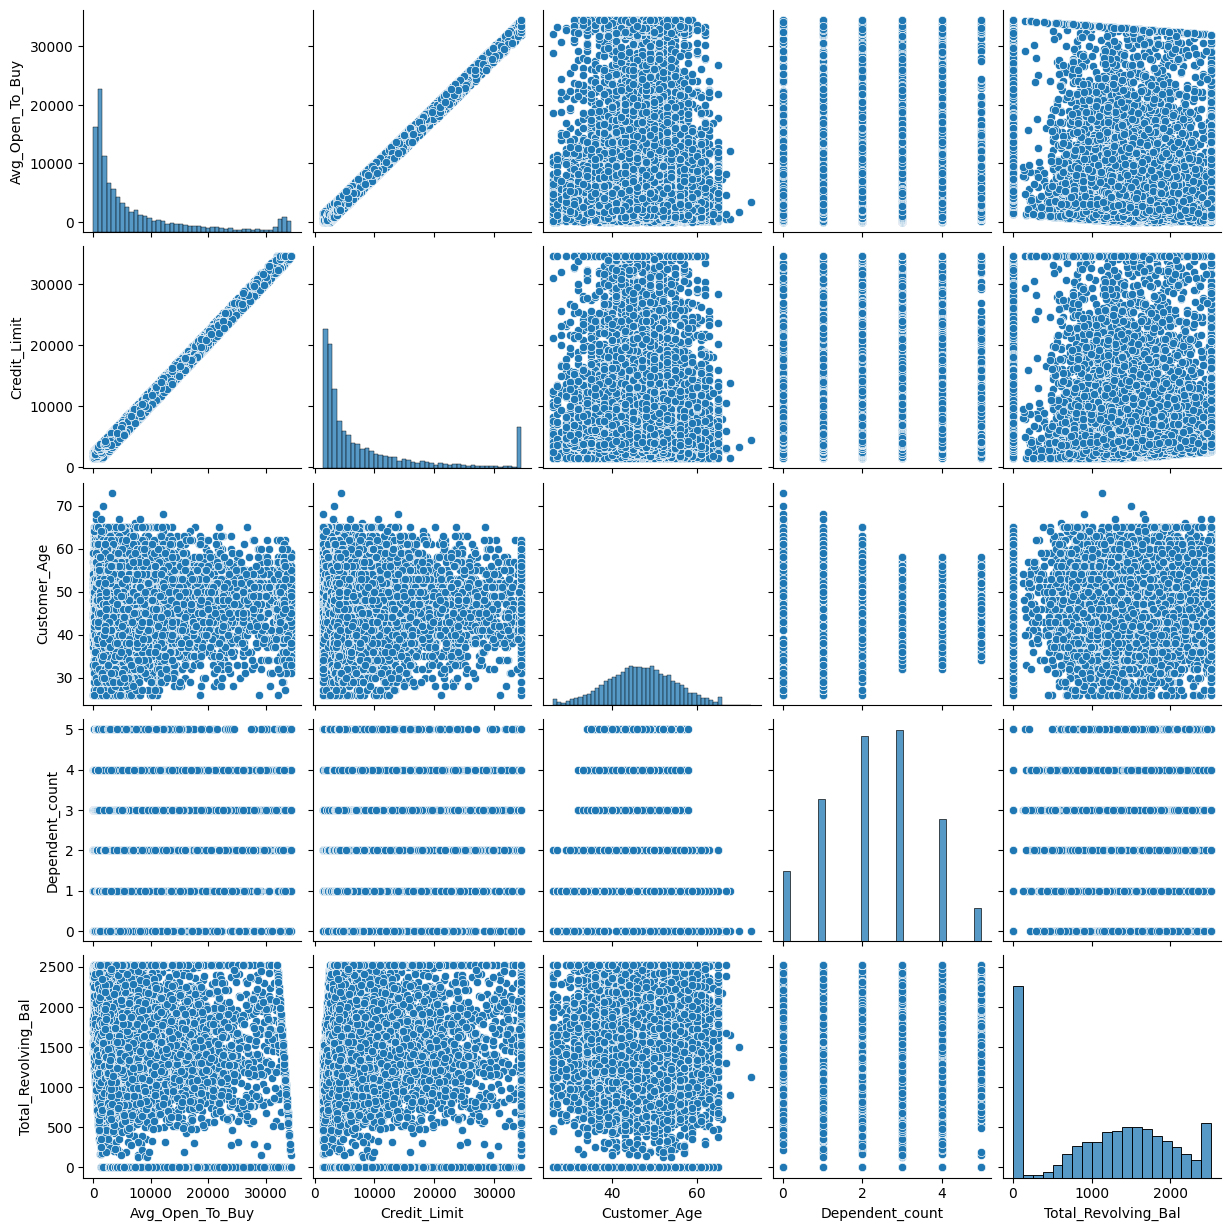

In [24]:
from operator import index
features_to_plot = ['Avg_Open_To_Buy','Credit_Limit',
                    'Customer_Age', 'Dependent_count',
                    'Total_Revolving_Bal']
pairplot_data = data[features_to_plot]
# Create the pairplot
sns.pairplot(pairplot_data)
plt.show()


سوال اول بخش سوم

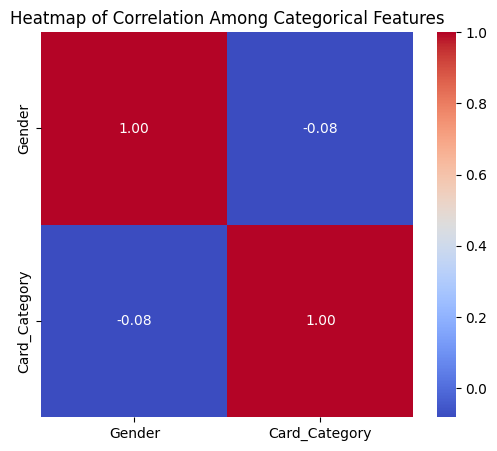

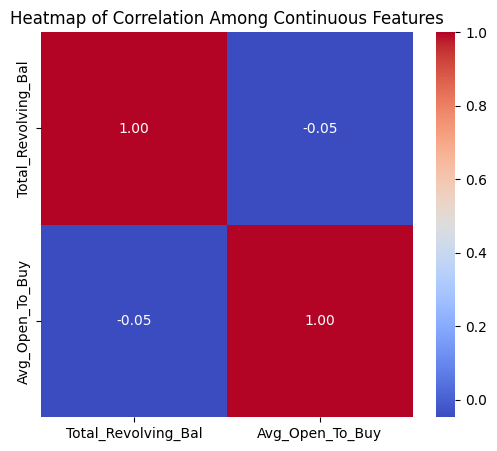

In [29]:
#chosing two categorical features
categorical_columns = ['Gender', 'Card_Category']
# mapping categorical features to 0 and 1
categorical_data = data[categorical_columns].copy()
categorical_data['Gender'] = categorical_data['Gender'].map({'M': 0,
                                                             'F': 1})
categorical_data['Card_Category'] = categorical_data['Card_Category'].map({'Blue': 0,
                                                                           'Gold': 1,
                                                                           'Silver': 2})
# Calculating the correlation matrix
categorical_correlation = categorical_data.corr()
# Plotting the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(categorical_correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Heatmap of Correlation Among Categorical Features')
plt.show()
# chosig continuous features
continuous_columns = ['Total_Revolving_Bal', 'Avg_Open_To_Buy']

# Dropping rows with missing or invalid values (if any)
continuous_data = data[continuous_columns].dropna()

# Calculating the correlation matrix
continuous_correlation = continuous_data.corr()

# Plotting the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(continuous_correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Heatmap of Correlation Among Continuous Features')
plt.show()

سوال اول بخش چهارم

In [27]:
# nan detection
print(data.isnull().sum())

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

سوال اول بخش پنجم

In [31]:
# number of labels in Attrition_Flag
labels = data['Attrition_Flag'].unique()
print(" labels : ", labels)

 labels :  ['Existing Customer' 'Attrited Customer']



  نمودار پای

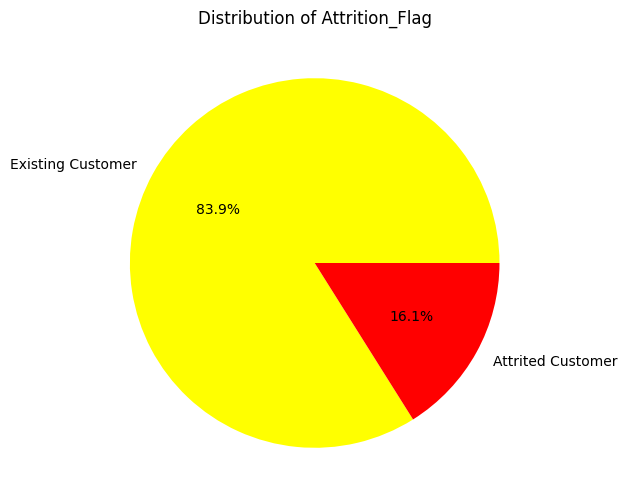

In [30]:
# class distribution
class_distribution = data['Attrition_Flag'].value_counts()
# plotting
plt.figure(figsize=(6, 6))
class_distribution.plot.pie(autopct='%1.1f%%', colors=['yellow', 'red'])
plt.title('Distribution of Attrition_Flag')
plt.ylabel('')
plt.show()

سوال اول بخش ششم بدون متعادل سازی

Logistic Regression training report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5081
           1       1.00      1.00      1.00       995

    accuracy                           1.00      6076
   macro avg       1.00      1.00      1.00      6076
weighted avg       1.00      1.00      1.00      6076

Logistic Regression validation report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1717
           1       1.00      1.00      1.00       308

    accuracy                           1.00      2025
   macro avg       1.00      1.00      1.00      2025
weighted avg       1.00      1.00      1.00      2025



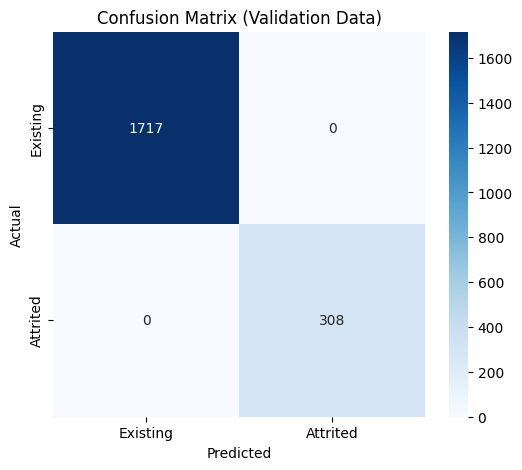

1.0

In [12]:

# Split data into features (X) and target (y)
X = data.drop(columns=['Attrition_Flag', 'CLIENTNUM'])  # Remove unnecessary columns
y = data['Attrition_Flag']

# Encode categorical variables into numeric values
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features
y = y.map({'Existing Customer': 0, 'Attrited Customer': 1})  # Map target variable to numeric

# Split data into training, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=63)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=63)

# Define the Logistic Regression model
logistic_model = LogisticRegression(random_state=63, max_iter=5000)

# Train the model
logistic_model.fit(X_train, y_train)
logistic_model.score(X_val, y_val)
# Make predictions on training and validation sets
y_train_pred = logistic_model.predict(X_train)
y_val_pred = logistic_model.predict(X_val)

# Generate classification report for training data
print("Logistic Regression training report :\n")
print(classification_report(y_train, y_train_pred))

# Generate classification report for validation data
print("Logistic Regression validation report :\n")
print(classification_report(y_val, y_val_pred))
# Plot confusion matrix for validation data
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Existing', 'Attrited'], yticklabels=['Existing', 'Attrited'])
plt.title('Confusion Matrix (Validation Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
logistic_model.score(X_test, y_test)

Class distribution before balancing: Attrition_Flag
0    5081
1     995
Name: count, dtype: int64
Class distribution after balancing: Attrition_Flag
0    5081
1    5081
Name: count, dtype: int64
Validation Set Accuracy: 1.00
Training Data Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5081
           1       1.00      1.00      1.00      5081

    accuracy                           1.00     10162
   macro avg       1.00      1.00      1.00     10162
weighted avg       1.00      1.00      1.00     10162


Validation Data Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1717
           1       1.00      1.00      1.00       308

    accuracy                           1.00      2025
   macro avg       1.00      1.00      1.00      2025
weighted avg       1.00      1.00      1.00      2025



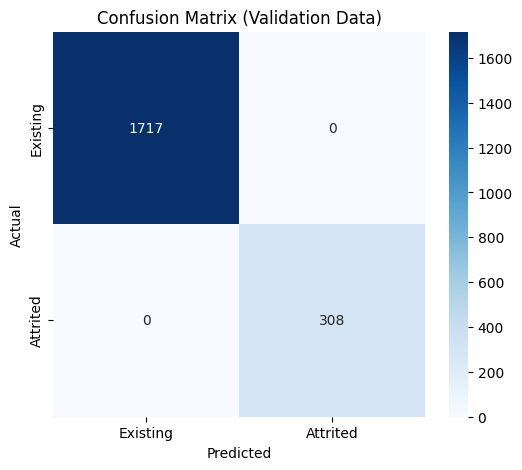

In [13]:

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=63)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Class distribution before balancing: {y_train.value_counts()}")
print(f"Class distribution after balancing: {pd.Series(y_train_balanced).value_counts()}")

# Define the Logistic Regression model with regularization
logistic_model = LogisticRegression(random_state=63, max_iter=5000, penalty='l2', C=1.0)

# Train the model
logistic_model.fit(X_train_balanced, y_train_balanced)

# Calculate the accuracy of the model on validation set
val_score = logistic_model.score(X_val, y_val)
print(f"Validation Set Accuracy: {val_score:.2f}")

# Make predictions on training and validation sets
y_train_pred = logistic_model.predict(X_train_balanced)
y_val_pred = logistic_model.predict(X_val)

# Generate classification reports
print("Training Data Classification Report (Logistic Regression):")
print(classification_report(y_train_balanced, y_train_pred))

print("\nValidation Data Classification Report (Logistic Regression):")
print(classification_report(y_val, y_val_pred))

# Plot confusion matrix for validation data
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Existing', 'Attrited'], yticklabels=['Existing', 'Attrited'])
plt.title('Confusion Matrix (Validation Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

BOUNCE

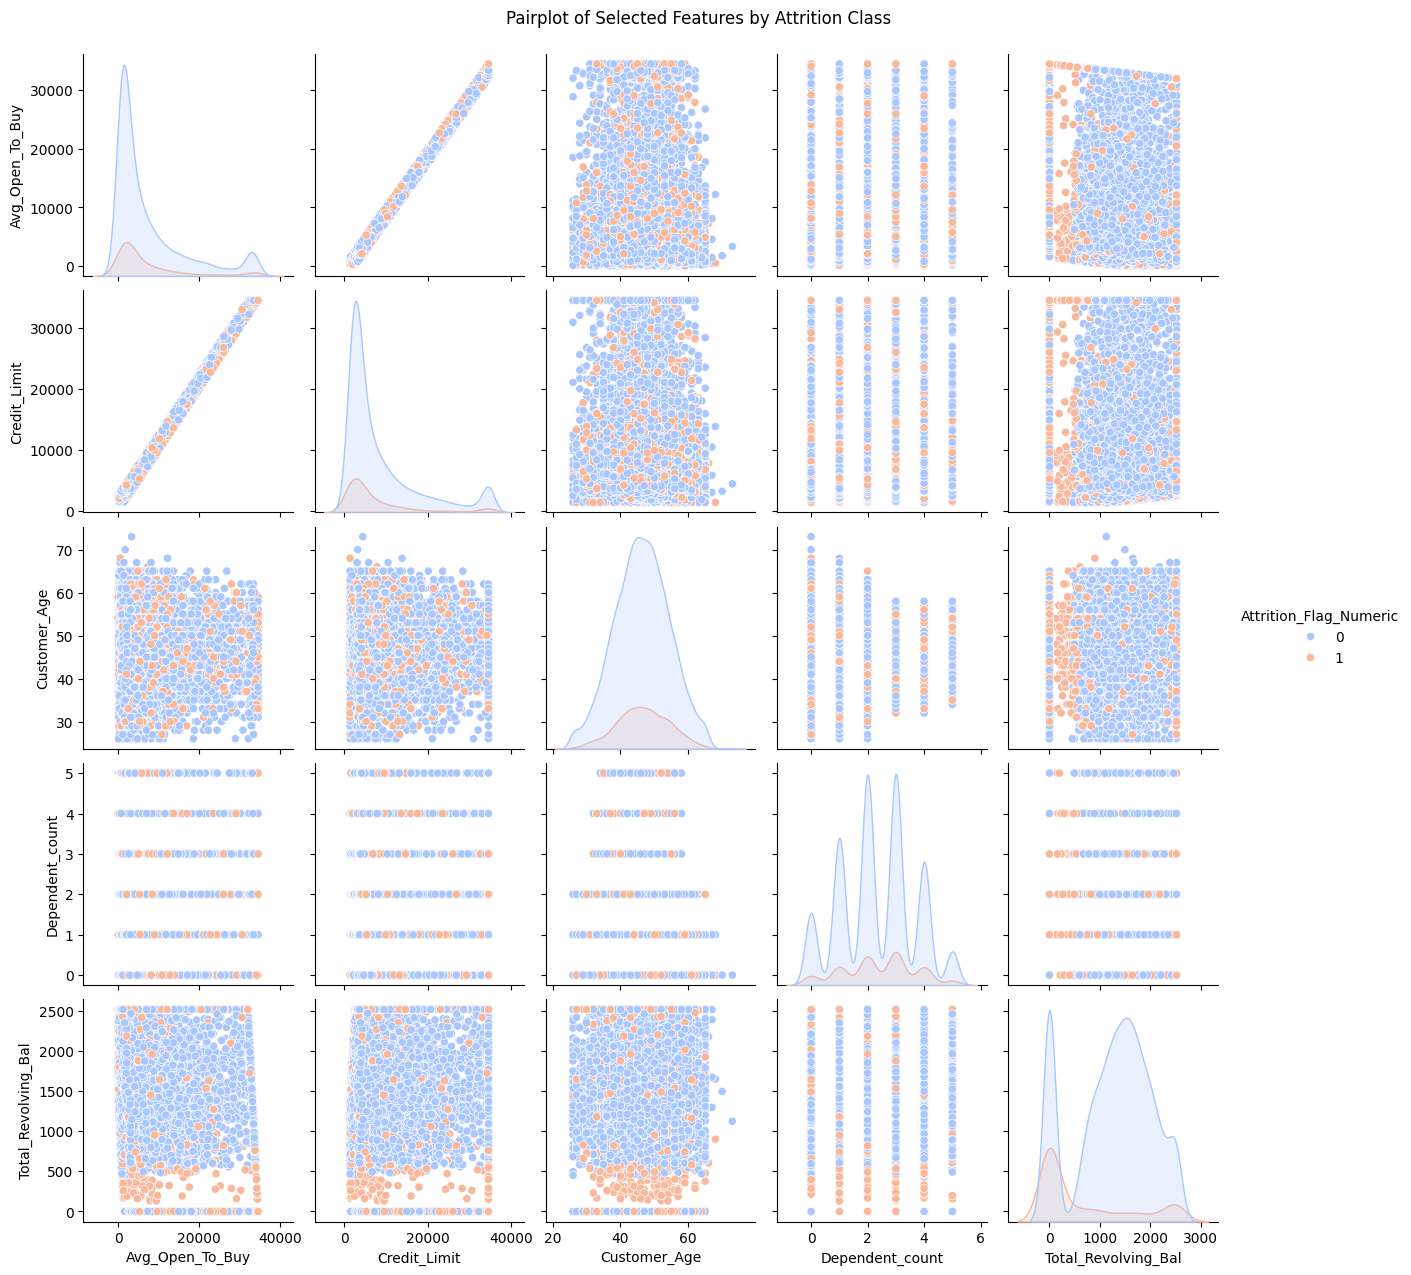

In [32]:

# Map the 'Attrition_Flag' column to numeric values directly
data_visual = data.copy()
data_visual['Attrition_Flag_Numeric'] = data_visual['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Select four features to visualize along with the target
selected_features = ['Avg_Open_To_Buy','Credit_Limit',
                    'Customer_Age', 'Dependent_count',
                    'Total_Revolving_Bal']
selected_features.append('Attrition_Flag_Numeric')  # Add the target column

# Create a pairplot with hue set to Attrition_Flag_Numeric
sns.pairplot(data_visual[selected_features], hue='Attrition_Flag_Numeric', palette='coolwarm', diag_kind='kde')

# Display the plot
plt.suptitle("Pairplot of Selected Features by Attrition Class", y=1.02)  # Adjust title position
plt.show()